In [1]:
import pickle
import matplotlib.pyplot as plt

# import mod_kernik as kernik

#############################################
from scipy.integrate import ode, solve_ivp
import os, sys, time
import numpy as np
import matplotlib.pyplot as plt
import pickle
import bisect

sys.path.append('../Protocols')
from pacing_protocol import PacingProtocol
from leakstaircase import LeakStaircase

sys.path.append('../')
import simulator_scipy

sys.path.append('../Lib')
import model_response

sys.path.append('../Models')
from br1977 import BR1977
from ord2011JK_v1 import ORD2011

import mod_trace as trace

In [2]:
def get_high_fitness(ga_result):
    best_individual = ga_result.generations[0][0]

    for i, gen in enumerate(ga_result.generations):
        best_in_gen = ga_result.get_high_fitness_individual(i)
        if best_in_gen.fitness > best_individual.fitness:            
            best_individual = best_in_gen

    return best_individual

In [3]:
ga_result = 0
def plot_current_conributions():
    trial_conditions = "trial_steps_ramps_ORD2011_256_64_4_-120_60"
    currents = []
    
    if 'ORD2011' in trial_conditions:
        currents = ['I_Na', 'I_NaL', 'I_to', 'I_CaL', 'I_Kr', 'I_Ks', 'I_K1' ]         
    elif 'BR1977' in trial_conditions:
        currents = ['I_Na', 'I_si', 'I_K1', 'I_x1']

    for i, current in enumerate(currents):
        ga_result = pickle.load(open(f'ga_results/{trial_conditions}/ga_results_{current}_artefact_False', 'rb'))
                
        best_individual = get_high_fitness(ga_result)
        protocol = best_individual.protocol
        print(protocol)
        
        model = None
        if 'ORD2011' in trial_conditions:
            model = ORD2011(protocol)
        elif 'BR1977' in trial_conditions:
            model = BR1977(protocol)  
        
        
        tr = model_response.get_model_response_JK(model, protocol)
        # k = kernik.KernikModel(is_exp_artefact=True)        
        # tr = k.generate_response(proto, is_no_ion_selective=False)

        tr.plot_currents_contribution(current, is_shown=True, title=current,
                saved_to=f'./ga_results/{trial_conditions}/{current}.svg')


In [4]:
trial_conditions = "trial_steps_ramps_ORD2011_256_64_4_-120_60"
current = 'I_Na'
ga_result = pickle.load(open(f'ga_results/{trial_conditions}/ga_results_{current}_artefact_False', 'rb'))
print(ga_result.generations[0][0].fitness)

0.8182353640663582


In [5]:
def main():
    plot_current_conributions()    

|RAMP: Voltage Start: -24.884265647446643, Voltage End: -107.35898059956352, Duration: 244.98109499829968| | |STEP: Voltage: -38.266220913694674, Duration: 663.2670320031141| | |STEP: Voltage: -119.88353380492657, Duration: 45.58985412063697| | |RAMP: Voltage Start: -30.35604144977756, Voltage End: -73.95635295816794, Duration: 407.8358525181555|
There is no pre-step simulation.


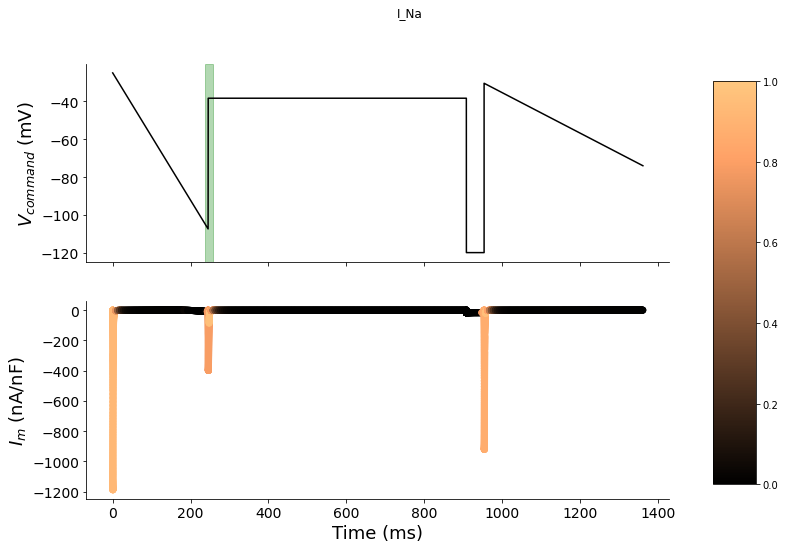

|STEP: Voltage: -115.69547260492953, Duration: 638.9592002615126| | |STEP: Voltage: -119.6223546833323, Duration: 955.168451140388| | |STEP: Voltage: -119.8576965483277, Duration: 996.8644734365002| | |RAMP: Voltage Start: 3.7172294215999893, Voltage End: -57.8159885307908, Duration: 71.3887040686221|
There is no pre-step simulation.


/opt/conda/lib/python3.7/site-packages/scipy/integrate/_ivp/bdf.py:403: RuntimeWarning: invalid value encountered in subtract
  D[order + 2] = d - D[order + 1]


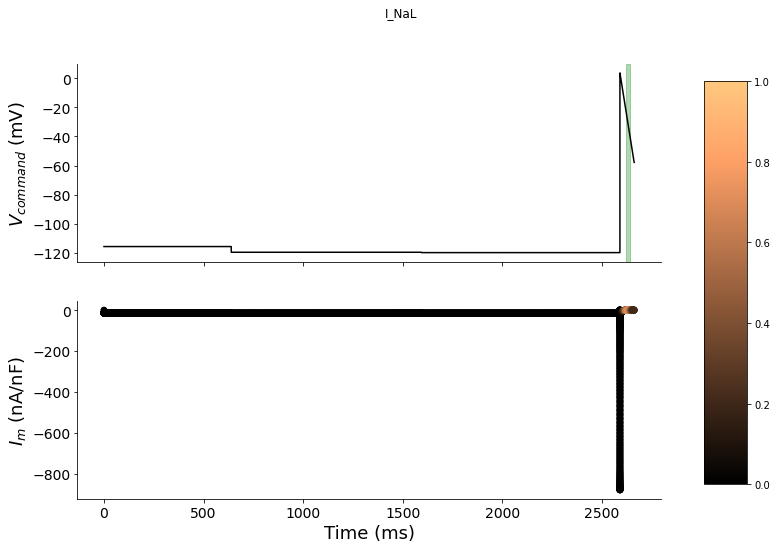

|STEP: Voltage: -67.88389241144574, Duration: 909.5205314490402| | |STEP: Voltage: -1.9696317047320235, Duration: 8.416853158577258| | |STEP: Voltage: 56.857834503513786, Duration: 788.197697813438| | |STEP: Voltage: -58.169469447523156, Duration: 849.5304906517213|
There is no pre-step simulation.


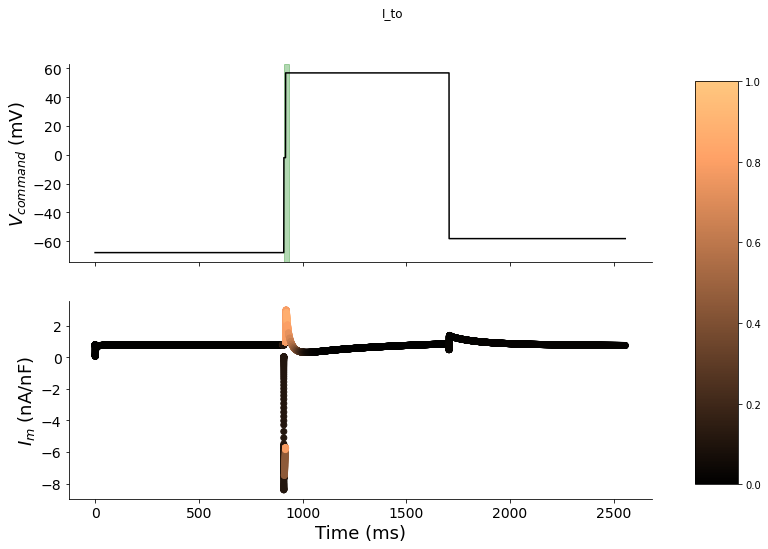

|STEP: Voltage: -26.19060719185606, Duration: 787.212197904703| | |STEP: Voltage: -30.444666105667196, Duration: 919.4340452834964| | |STEP: Voltage: -27.160045673953576, Duration: 800.050979131317| | |RAMP: Voltage Start: 0.8251504608809732, Voltage End: -45.26751740947014, Duration: 374.81897345797097|
There is no pre-step simulation.


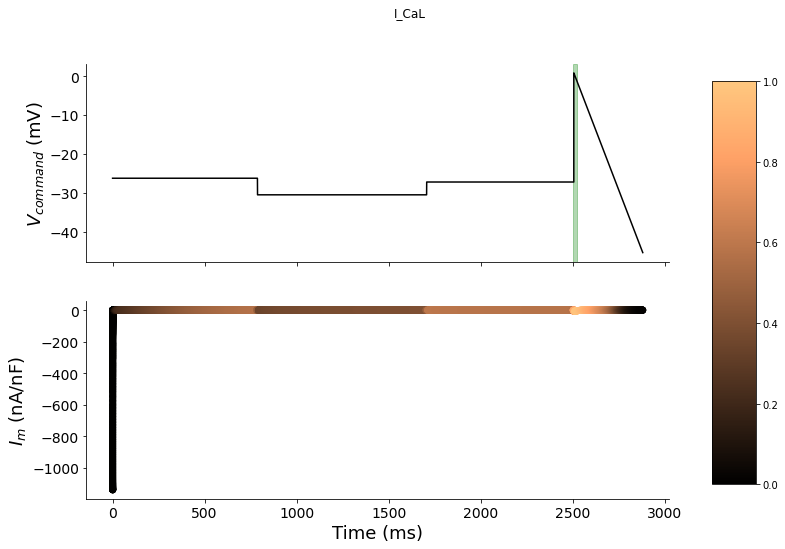

|RAMP: Voltage Start: -42.7206855696912, Voltage End: -43.18851412725466, Duration: 785.2319336010398| | |RAMP: Voltage Start: 55.2476426662719, Voltage End: -36.92450183072428, Duration: 70.7598048340787| | |RAMP: Voltage Start: -7.580786306888111, Voltage End: -63.24497916252036, Duration: 731.563780378318| | |RAMP: Voltage Start: 58.115644506212604, Voltage End: -38.27757857875151, Duration: 72.2245032424307|
There is no pre-step simulation.


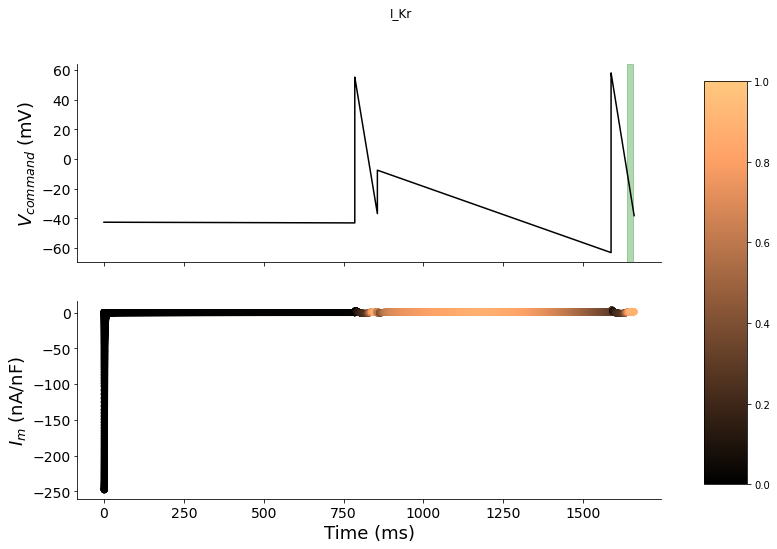

|RAMP: Voltage Start: 32.53547322773393, Voltage End: 43.3051223369443, Duration: 745.2663353006574| | |RAMP: Voltage Start: -18.531234799936712, Voltage End: -95.17055302203019, Duration: 230.75150709240776| | |STEP: Voltage: 38.32871843498319, Duration: 886.8841948894465| | |STEP: Voltage: -87.83515136570074, Duration: 230.06675835733296|
There is no pre-step simulation.


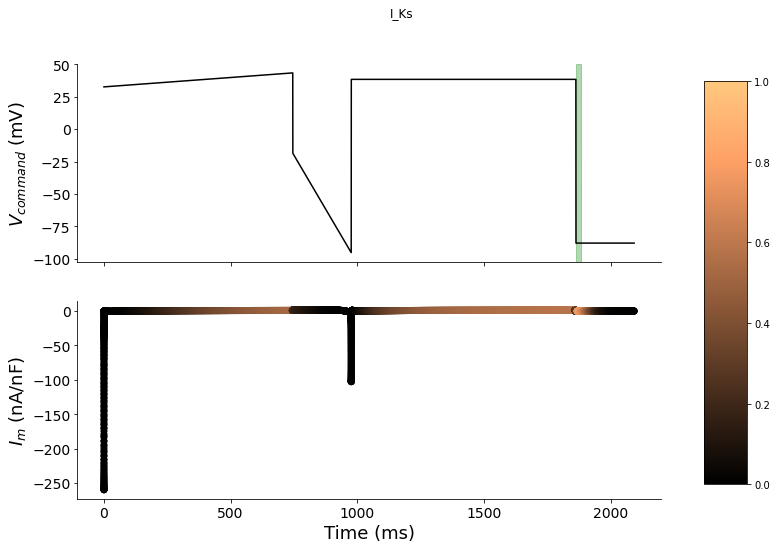

|STEP: Voltage: -119.41986638651882, Duration: 866.8948596707727| | |STEP: Voltage: -119.9967079517016, Duration: 832.3935765576549| | |RAMP: Voltage Start: -115.01361044900646, Voltage End: -99.88287924922722, Duration: 865.3827750074779| | |STEP: Voltage: -119.9967079517016, Duration: 832.3935765576549|
There is no pre-step simulation.


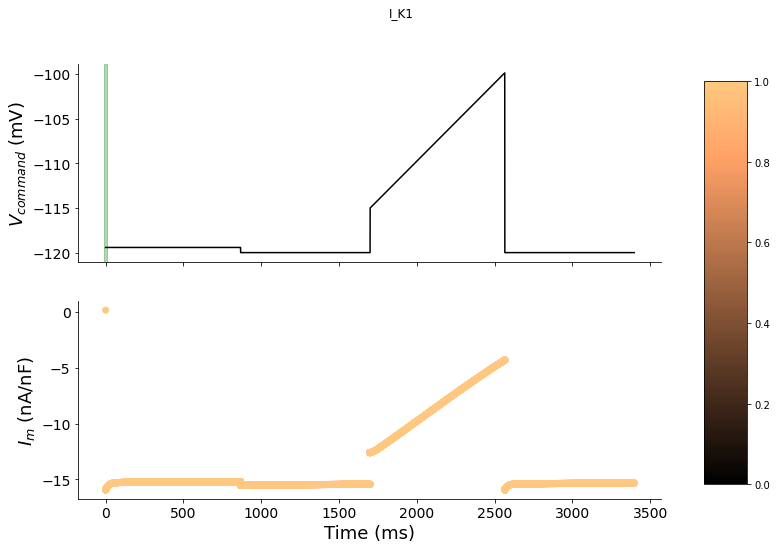

=====Complete==============================


In [6]:
if __name__ == '__main__':
    main()
    print("=====Complete==============================")